In [1]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

### [The Tree Structure](https://pmorissette.github.io/bt/tree.html)
- The tree structure allows you to mix and match securities and strategies in order to express your sophisticated trading ideas. Here is a very simple diagram to help explain this concept:
    
    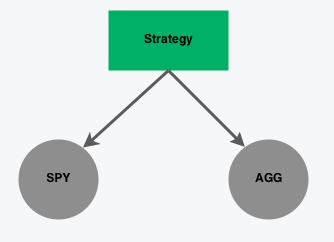

- A simple strategy with two children that happen to be securities. However, children nodes don’t have to be securities. They can also be strategies.
- This concept is very powerful as it allows you to combine strategies together and allocate capital dynamically between different strategies as time progresses using sophisticated allocation logic.


- For example, say we didn’t mind having a passive bond allocation (AGG in the above graph), but we wanted to swap out the equity portion (SPY) for something a little more sophisticated.
- In this case, we will swap out the SPY node for another strategy. This strategy could be a momentum strategy that attempts to pick the best performing ETF every month
- to keep it simple, let’s say it picks either the SPY or the EEM based on total return over the past 3 months.

    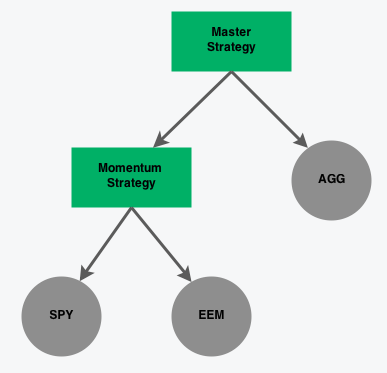


In [2]:
import bt
from bt.core import Strategy
from bt.backtest import Backtest
from bt.algos import RunMonthly, SelectAll, SelectMomentum, WeighEqually, Rebalance

data = bt.get("spy,agg,eem", start="2010-01-01", end="2017-01-01")


yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
# 모멘텀 전략
momentum_strategy = Strategy(
    "Momentum Strategy",
    algos=[RunMonthly(), SelectAll(), SelectMomentum(1), WeighEqually(), Rebalance()],
    children=["spy", "eem"],
)

# 최상위 마스터 전략
master_strategy = Strategy(
    "Master Strategy",
    algos=[RunMonthly(), SelectAll(), WeighEqually(), Rebalance()],
    children=[momentum_strategy, "agg"],  # 하위로 종목이 아닌 전략을 넣는다.
)

backtest = Backtest(strategy=master_strategy, data=data)

result = bt.run(backtest)

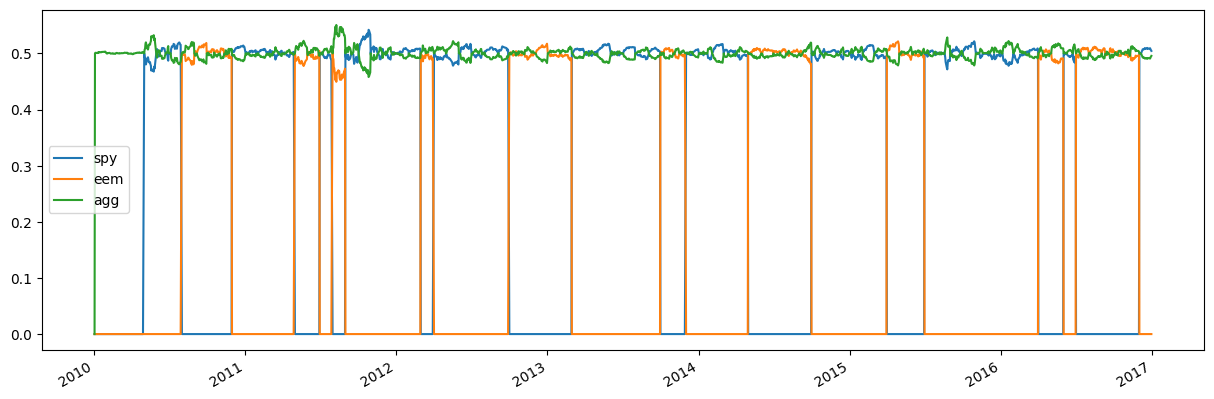

In [4]:
result.plot_security_weights()

<Axes: title={'center': 'Equity Progression'}>

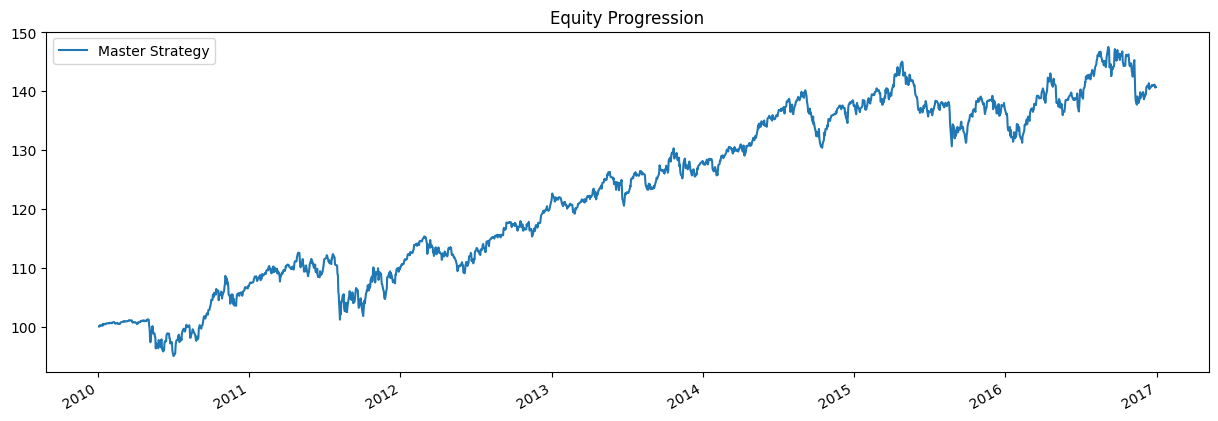

In [5]:
result.plot()

### 동일하게 sub-strategy를 생성하는 방식
- it enables algos to create sub-strategies on-the-fly (based on market conditions/triggers) and register them to the target. Each of these sub-strategies will have its own algos and performance measurement.

In [6]:
# 최상위 마스터 전략
master_strategy = Strategy(
    "Master Strategy",
    algos=[RunMonthly(), SelectAll(), WeighEqually(), Rebalance()],
    children=["agg"],  # 하위 전략을 모를 수 있다.
)

# 모멘텀 전략
momentum_strategy = Strategy(
    "Momentum Strategy",
    algos=[RunMonthly(), SelectAll(), SelectMomentum(1), WeighEqually(), Rebalance()],
    children=["spy", "eem"], parent=master_strategy # 상위 전략을 정의
)

backtest = Backtest(strategy=master_strategy, data=data)
result = bt.run(backtest)

<Axes: title={'center': 'Equity Progression'}>

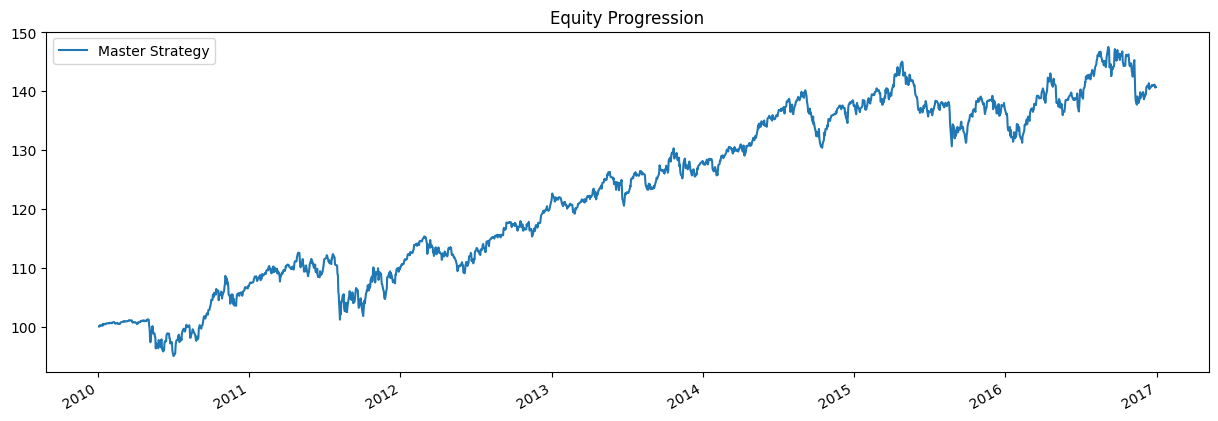

In [7]:
result.plot()